<a href="https://colab.research.google.com/github/t-sommer/fmpy-tutorial/blob/master/simple_cooling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%matplotlib notebook

In [2]:
# Install dependencies
!pip install fmpy
from fmpy import *

In [3]:

# Download the FMU
from fmpy.util import download_file
filename = download_file('https://github.com/t-sommer/fmpy-tutorial/raw/master/SimpleCooling.fmu')

In [4]:
filename = 'SimpleCooling.fmu'

<IPython.core.display.Javascript object>


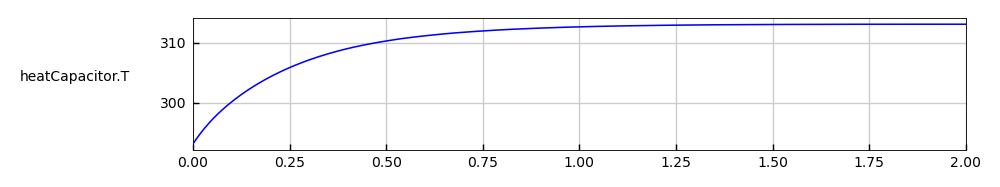

In [9]:
result = simulate_fmu(filename, start_values={'thermalConductance.k': 1}, output=['heatCapacitor.T'], stop_time=2)
plot_result(result)

<IPython.core.display.Javascript object>


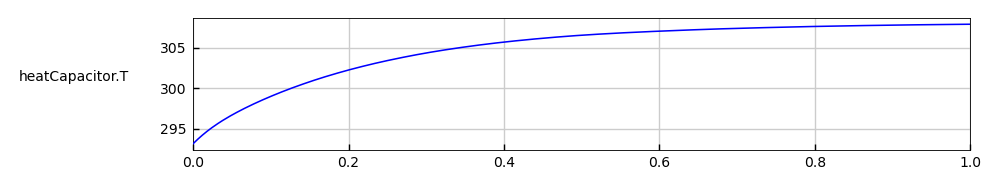

In [6]:
result = simulate_fmu(filename, start_values={'thermalConductance.k': 2}, output=['heatCapacitor.T'])
plot_result(result)